# Week 4: Lotka-Volterra

<hr/>

In [76]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for pretty plots
import seaborn as sns
sns.set()

In [287]:
def logistic_growth_rhs(xy, t, r1, K1, r2, K2):
    """
    Right hand side for logistic growth.
    Looking at two population silumtaneously 
    """
    x, y = xy
    
    # Compute dx/dt
    dx_dt =  r*x*(1-x/K)
    
     # Compute dy/dt
    dx_dt =  r*x*(1-x/K)

    # Return the result as a NumPy array
    return np.array([dx_dt])

In [291]:
# Time points we want for the solution
t = np.linspace(0, 10, 1000)

# Initial condition
x_0 = np.array([1])

# Parameters
r = 2 
K = 1000

# Package parameters into a tuple
args = (r, K)

# Integrate ODES
x = scipy.integrate.odeint(logistic_growth_rhs, x_0, t, args=args)

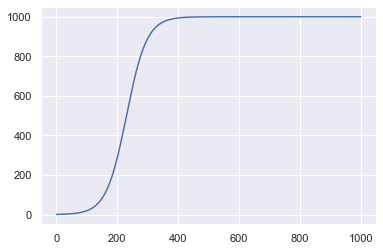

In [290]:
plt.plot(x)

## Integrate by looping through time

Below we will explore the system of equations:

$$\dot x = x(3-x-2y)$$
$$\dot y = y(2-x-y)$$ 

which is one particular example of a Lotka-Volterra model. Later we will consider more generic forms, but for now we will imagine this is modeling a population of rabbits, $x(t)$ and of sheep, $y(t)$.

While we don't yet have the mathematical tools for how to analyze a system of two differential equations, we can still rely on computational (i.e. numerical) methods to see how this system will change over time.

In [100]:
for t in range(num_steps-1):
    x[t+1] = x[t] + x[t]*(3 - 2*x[t] - y[t])*dt 
    y[t+1] = y[t] + y[t]*(2 - x[t] - y[t])*dt 

## Plot our results in the x, y plane

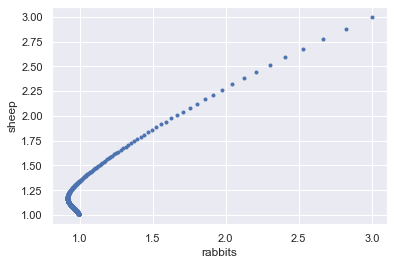

In [98]:
plt.plot(x,y,'.')
plt.xlabel('rabbits')
plt.ylabel('sheep');

## Plot our results over time 

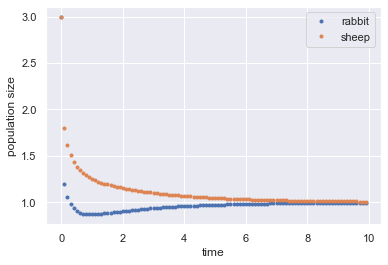

In [95]:
times = np.arange(num_steps)*dt
plt.plot(times, x, '.')
plt.plot(times, y, '.')
plt.xlabel('time')
plt.ylabel('population size')
plt.legend(["rabbit","sheep"]);

## Let's put this all in a function!

In [89]:
def lotka_volterra(x_0, y_0):
    
    # set up initial conditions
    x = np.zeros(num_steps)
    x[0] = x_0
    y = np.zeros(num_steps)
    y[0] = y_0
    
    # numerically integrate
    for t in range(num_steps-1):
        x[t+1] = x[t] + x[t]*(3 - 2*x[t] - y[t])*dt 
        y[t+1] = y[t] + y[t]*(2 - x[t] - y[t])*dt 
        
    return x, y

Now we can repeatedly call our function for different starting values to see how the systems behaves over time. From the behavior, we can start to see which fixed points are stable and which are unstable. 

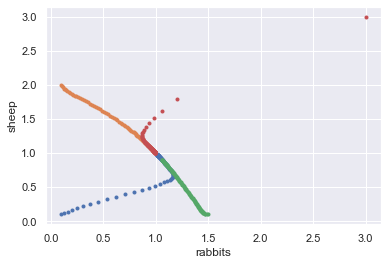

In [91]:
x, y = lotka_volterra(0.1,0.1)
plt.plot(x,y,'.')

x, y = lotka_volterra(0.1,2)
plt.plot(x,y,'.')

x, y = lotka_volterra(1.5,0.1)
plt.plot(x,y,'.')

x, y = lotka_volterra(3,3)
plt.plot(x,y,'.')

x, y = lotka_volterra(3,3)
plt.plot(x,y,'.')

plt.xlabel('rabbits')
plt.ylabel('sheep');

## 6.4.2

In [105]:
def LV_rhs(xy, t):
    """
    Right hand side for lotka-volterra
    """
    # Unpack x and y
    x,y = xy
    
    # Compute dx/dt
    dx_dt =  x*(3 - 2*x - y) 
    
    # Compute dy/dt
    dy_dt =  x*(2 - x - y) 
    
    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

In [106]:
import scipy.integrate

In [124]:
# Time points we want for the solution
t = np.linspace(0, 10, 1000)

# Initial condition
xy_0 = np.array([3.0, 3.0])

# Integrate ODES
xy = scipy.integrate.odeint(LV_rhs, xy_0, t)

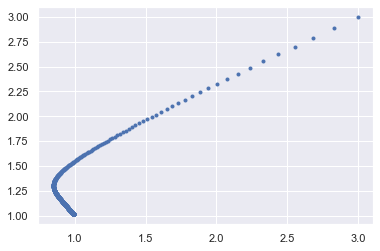

In [125]:
xy
x = xy[:,0]
y = xy[:,1]
plt.plot(x,y,'.')

## 6.4.6

In [126]:
def double_log_rhs(xy, t, r1, r2, K1, K2, b1, b2):
    """
    Right hand side for lotka-volterra
    """
    # Unpack x and y
    x,y = xy
    
    # Compute dx/dt
    dx_dt = r1*x*(1-x/K1) - b1*x*y
    
    # Compute dy/dt
    dy_dt =  r2*y*(1-y/K2) - b2*x*y
    
    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

In [143]:
# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xy_0 = np.array([100, 10 ])

# Parameters
r1 = 0.2 
r2 = 0.1
K1 = 1000
K2 = 500
b1 = 0.1
b2 = 0.01

# Package parameters into a tuple
args = (r1, r2, K1, K2, b1, b2)

# Integrate ODES
xy = scipy.integrate.odeint(double_log_rhs, xy_0, t, args=args)

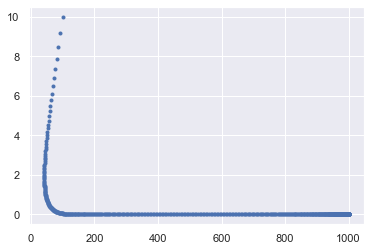

In [144]:
xy
x = xy[:,0]
y = xy[:,1]
plt.plot(x,y,'.')

In [167]:
def epi_rhs(xyz, t, k, l):
    """
    Right hand side for lotka-volterra
    """
    # Unpack x and y
    x,y,z = xyz
    
    # Compute dx/dt
    dx_dt = -k*x*y
    
    # Compute dy/dt
    dy_dt = k*x*y - l*y
    
    dz_dt = l*y
    
    #print(dx_dt,dy_dt,dz_dt)
    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt, dz_dt])

In [260]:
# Time points we want for the solution
t = np.linspace(0, 20, 1000)

# Initial condition
xyz_0 = np.array([99, 1, 0 ])

# Parameters
k = 0.01
l = 0.01

# Package parameters into a tuple
args = (k, l)

# Integrate ODES
xyz = scipy.integrate.odeint(epi_rhs, xyz_0, t, args=args)

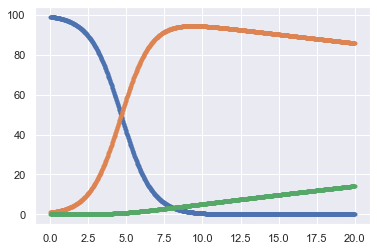

In [261]:
plt.plot(t, xyz[:,0], '.')
plt.plot(t, xyz[:,1], '.')
plt.plot(t, xyz[:,2], '.')

In [175]:
xyz[:,0][2]

0.002001077175525567

In [270]:
def LV_PP_rhs(xy, t, mu):
    """
    Right hand side for lotka-volterra
    """
    
    # Unpack x and y
    x,y = xy
    
    # Compute dx/dt
    dx_dt = x*(1-y)
    
    # Compute dy/dt
    dy_dt = mu*y*(x-1)
    
    #print(dx_dt,dy_dt,dz_dt)
    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

In [279]:
# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xy_0 = np.array([2, 2])

# Parameters
mu=2

# Package parameters into a tuple
args = (mu,)

# Integrate ODES
xy = scipy.integrate.odeint(LV_PP_rhs, xy_0, t, (mu,))

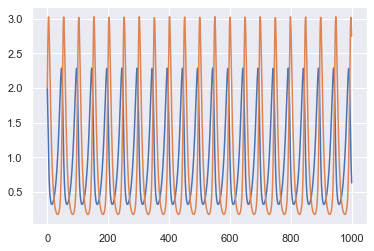

In [280]:
plt.plot(xy[:,0])
plt.plot(xy[:,1])